In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
data = pd.read_csv('iris_species_data.csv')

## Univariate analysis of target variable

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:xlabel='Species'>

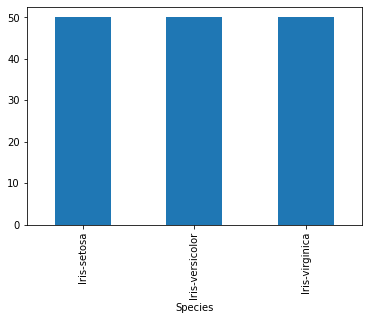

In [29]:
data.groupby('Species')['Id'].count().plot(kind = "bar")

## Analysis of feature variables

### Renaming labels

In [30]:
data['Species'] = data['Species'].map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica':3})

In [31]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [32]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


### Determining outliers

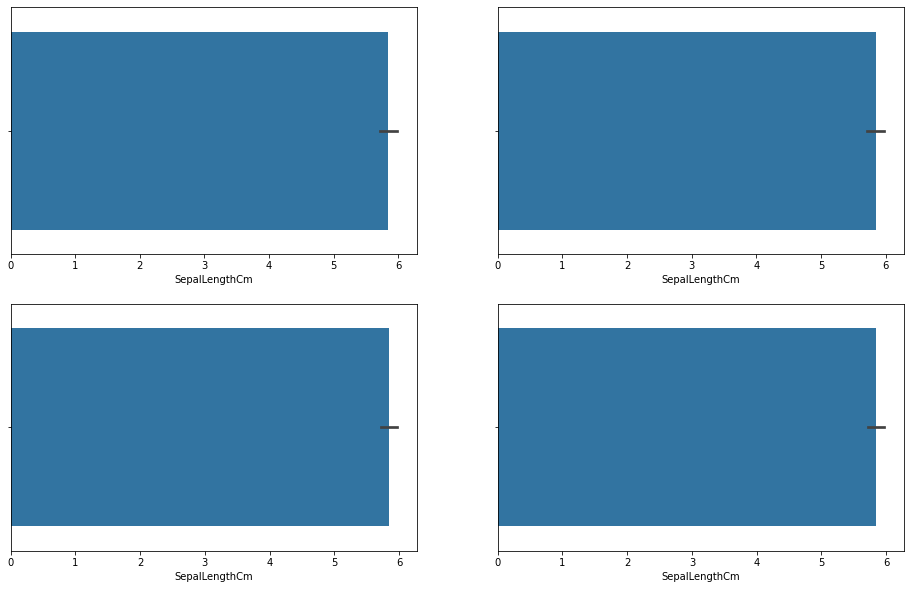

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.barplot(data, x=data['SepalLengthCm'], ax=ax[0, 0])
sns.barplot(data, x=data['SepalLengthCm'], ax=ax[0, 1])
sns.barplot(data, x=data['SepalLengthCm'], ax=ax[1, 0])
sns.barplot(data, x=data['SepalLengthCm'], ax=ax[1, 1])
plt.show()

### Plotting distribution

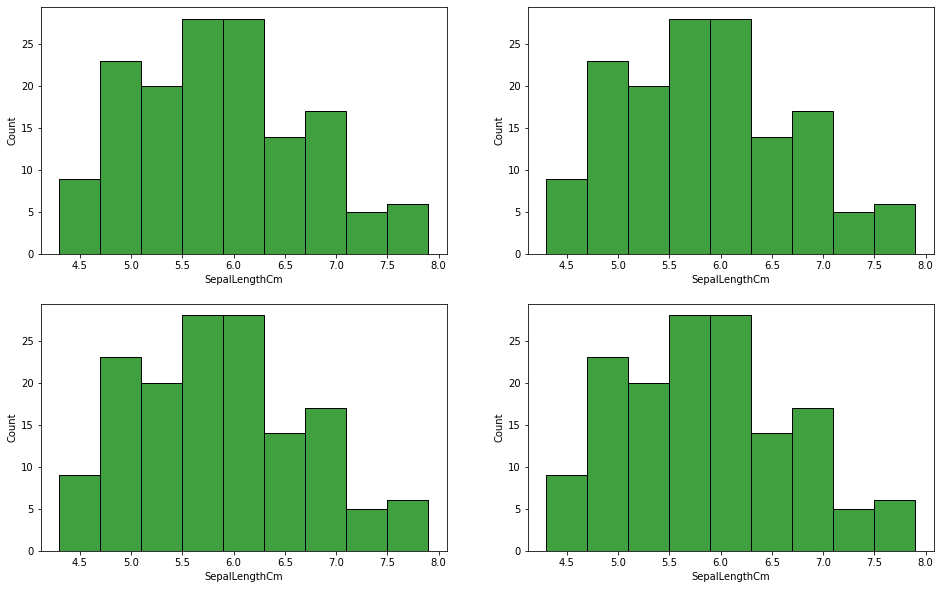

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.histplot(data, x=data['SepalLengthCm'], ax=ax[0, 0], color="green")
sns.histplot(data, x=data['SepalLengthCm'], ax=ax[0, 1], color="green")
sns.histplot(data, x=data['SepalLengthCm'], ax=ax[1, 0], color="green")
sns.histplot(data, x=data['SepalLengthCm'], ax=ax[1, 1], color="green")
plt.show()

### Plotting correlation

In [35]:
data = data.drop(columns="Id")

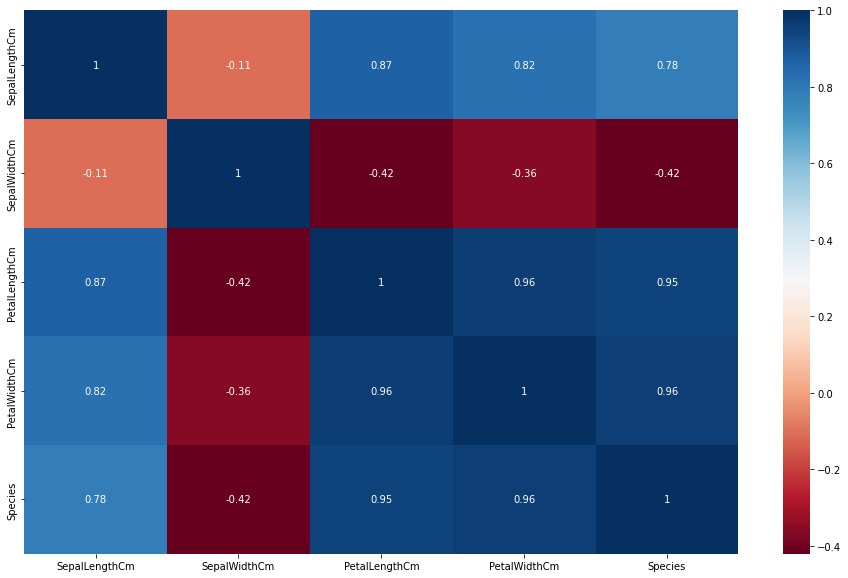

In [36]:
fig, ax = plt.subplots(figsize= (16, 10))
sns.heatmap(data.corr(), annot = True, cmap = "RdBu")
plt.show()

In [37]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

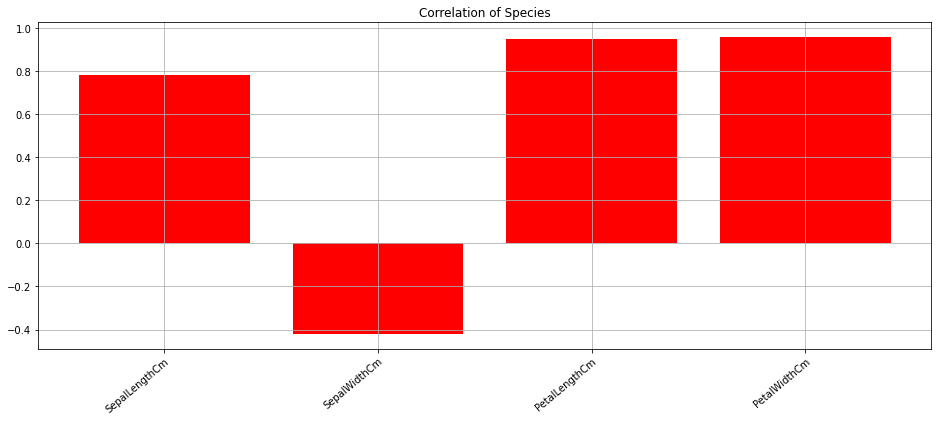

In [38]:
fig, ax = plt.subplots(figsize= (16, 6))
plt.bar(features, data.corr()['Species'].drop("Species"), color="red")
plt.grid()
plt.xticks(rotation="40", ha="right", rotation_mode = "anchor")
plt.title("Correlation of Species")
plt.show()

## Splitting dataset

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X= data.drop(columns="Species")
Y= data['Species']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## Scaling feature variables

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [46]:
x_train[:5]

array([[ 0.56492502,  0.45298391,  1.2657795 ,  1.66862297],
       [ 0.68598038, -0.70357075,  1.04468264,  1.15944368],
       [-1.73512684, -0.47225982, -1.27683434, -1.25915796],
       [ 1.29125718, -0.00963796,  0.65776314,  0.39567474],
       [-1.00879467,  0.68429484, -1.22156013, -1.25915796]])

In [47]:
x_test[:5]

array([[-0.76668395, -0.93488168,  0.10502101,  0.26837992],
       [ 0.44386966, -2.09143633,  0.43666629,  0.39567474],
       [ 1.04914646, -0.00963796,  0.38139208,  0.26837992],
       [-0.04035179, -0.93488168,  0.10502101,  0.01379027],
       [ 2.25970007, -1.16619261,  1.76324742,  1.41403333]])

## Predictive analysis

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [52]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  93.33333333333333


In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  93.33333333333333


In [54]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred)*100)

Accuracy Score:  96.66666666666667
